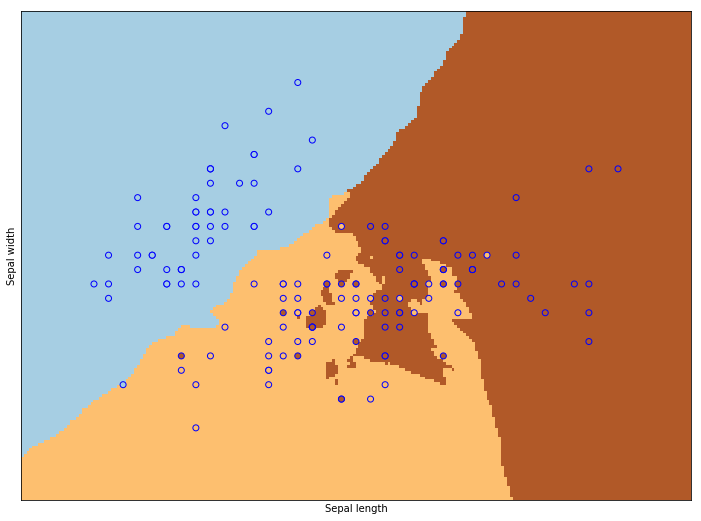

In [2]:
# Импортируем все необходимые библиотеки. sklearn устанавливается через pip или conda
import numpy as np
import pylab as pl
from sklearn import neighbors, datasets

# Импортируем данные. Спасибо sklearn, в нём есть модуль datasets, содержащий известные базы данных.
iris = datasets.load_iris()
# Берем все входные примеры из базы, но для каждого примера берем только первые два признака (т.е. берем подмассив)
X = iris.data[:, :2]
# Т.к. взяли все входные примеры, берем все выходные значения - класс ириса.
Y = iris.target

# шаг сетки
h = .02

# И снова спасибо sklearn: создаем экземпляр классификатора kNN
# Мы берем все параметры по умолчанию, а вообще их можно задать
knn=neighbors.KNeighborsClassifier()

# "Обучаем" классификатор на наших данных
knn.fit(X, Y)

# Рассчитаем точность классификации (раскомментируйте три следующие строки и впишите код для расчета точности)
#acc = <ваш код здесь>
#result = "Точность: {} %".format(np.round(acc*100, 3))
#print(result)

# Построим диаграмму, иллюстрирующую полученные классы.
# Для этого присвоим каждой ячейке сетки [x1_min, x1_max]x[x2_min, x2_max]
# цвет класca, которому она принадлежит.

# Находим x1_min, x1_max, x2_min, x2_max - это минимальные и максимальные значения 
# двух признаков, содержащихся в X. Слагаемое 0.5 - для отступа на диаграмме.
x1_min, x1_max = X[:,0].min() - .5, X[:,0].max() + .5
x2_min, x2_max = X[:,1].min() - .5, X[:,1].max() + .5
# Строим сетки, т.е. матрицы, содержащие значения признаков в диапазоне от min до max
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
# Скармливаем эти матрицы классификатору, на выходе получаем значение класca для каждой ячейки
Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
# Приведем форму результата к матрице такого же размера, что и матрицы признаков
Z = Z.reshape(x1.shape)

# Строим цветную диаграмму зависимости класса (Z) от признаков (x1, x2).
# Класc обозначен цветом.
pl.figure(1, figsize=(12, 9))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(x1, x2, Z)

# Также построим точки, показывающие обучающие примеры.
# Это будет диаграмма рассеяния (scater plot)
pl.scatter(X[:,0], X[:,1],c=Y, edgecolors="b")
# Подпишем оси
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')
# Укажем границы диаграммы
pl.xlim(x1.min(), x1.max())
pl.ylim(x2.min(), x2.max())
pl.xticks(())
pl.yticks(())
# Выведем, что получилось
pl.show()